# DBScan Clustering

  - Density-Based Spatial Clustering of Applications with Noise, is a popular learning method utilized in model building and machine learning algorithms. This is a clustering method that is used in machine learning to separate clusters of high density from clusters of low density

## Imports

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [53]:
# importing the dataset

data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Select Features

In [54]:
x = data.loc[:, ['Annual Income (k$)','Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## Epsilon Parameter Calculation

In [55]:
# Import

from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

In [56]:
# Check Values

distances

array([[ 0.        ,  2.23606798],
       [ 0.        ,  4.12310563],
       [ 0.        ,  2.        ],
       [ 0.        ,  1.41421356],
       [ 0.        ,  2.23606798],
       [ 0.        ,  1.41421356],
       [ 0.        ,  2.        ],
       [ 0.        ,  5.09901951],
       [ 0.        ,  3.16227766],
       [ 0.        ,  4.47213595],
       [ 0.        ,  1.41421356],
       [ 0.        ,  4.12310563],
       [ 0.        ,  1.41421356],
       [ 0.        ,  2.        ],
       [ 0.        ,  1.41421356],
       [ 0.        ,  2.        ],
       [ 0.        ,  3.        ],
       [ 0.        ,  6.32455532],
       [ 0.        ,  5.83095189],
       [ 0.        ,  4.12310563],
       [ 0.        ,  3.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  5.09901951],
       [ 0.        ,  1.        ],
       [ 0.        ,  5.        ],
       [ 0.        ,  5.09901951],
       [ 0.        ,  1.41421356],
       [ 0.        ,  8.60232527],
       [ 0.        ,

In [57]:
# Check Values

indices

array([[  0,   4],
       [  1,   3],
       [  2,   6],
       [  3,   5],
       [  4,   0],
       [  5,   3],
       [  6,   2],
       [  7,  11],
       [  8,   6],
       [  9,   5],
       [ 10,  12],
       [ 11,  19],
       [ 12,  10],
       [ 13,  15],
       [ 14,  10],
       [ 15,  13],
       [ 16,  20],
       [ 17,   9],
       [ 18,  26],
       [ 19,  11],
       [ 20,  16],
       [ 21,  23],
       [ 22,  30],
       [ 23,  21],
       [ 24,  34],
       [ 25,  29],
       [ 26,  28],
       [ 27,  17],
       [ 28,  26],
       [ 29,  25],
       [ 30,  32],
       [ 31,  37],
       [ 32,  30],
       [ 33,  41],
       [ 34,  36],
       [ 35,  25],
       [ 36,  34],
       [ 37,  39],
       [ 38,  44],
       [ 39,  37],
       [ 40,  42],
       [ 41,  33],
       [ 42,  40],
       [ 43,  51],
       [ 44,  38],
       [ 45,  43],
       [ 46,  52],
       [ 47,  54],
       [ 48,  49],
       [ 48,  49],
       [ 50,  52],
       [ 51,  53],
       [ 52,

## Sort and Plot the Results

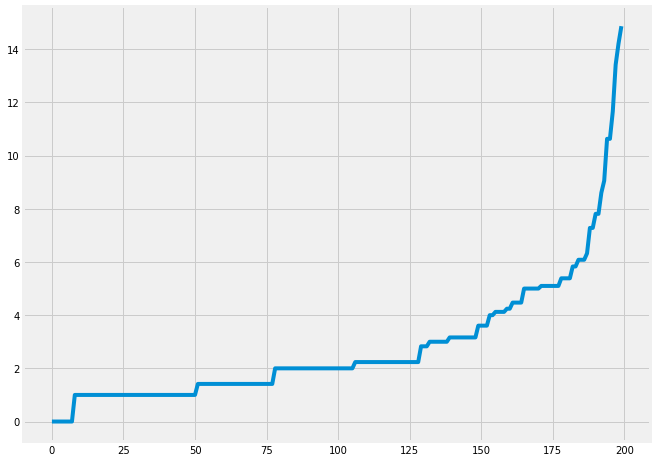

In [58]:
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]

plt.rcParams['figure.figsize'] = (10,8)
plt.plot(distances)
plt.show()

In [59]:
# Epsilon value is the maximum curvature (around 8)
# Minimum Sample value is 4

## DBSCAN Implementation

In [60]:
# Import

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 8, min_samples = 4)
clusters = dbscan.fit_predict(x)

## Plot the Cluster Assignments

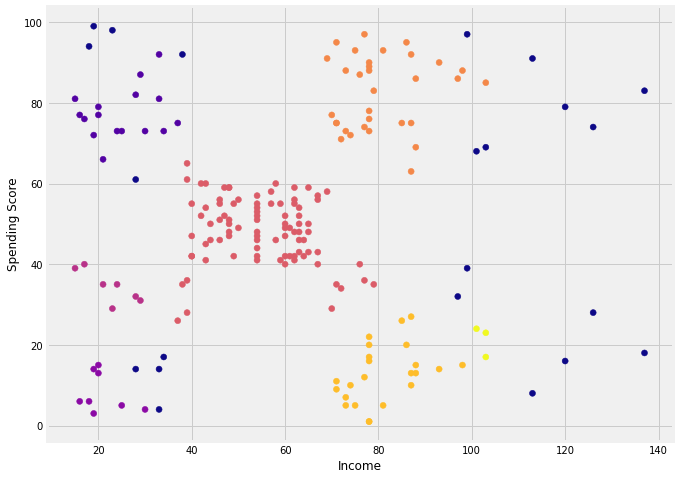

In [61]:
plt.scatter(x.iloc[:,0], x.iloc[:,1], c = clusters, cmap = 'plasma')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()